## Kiva贷款数据集

了解一下：http://www.jpm.cn/article-12-1.html

导入工具包

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [4]:
kiva_loans_data = pd.read_csv("kiva_loans.csv")
kiva_mpi_locations_data = pd.read_csv("kiva_mpi_region_locations.csv")
loan_theme_ids_data = pd.read_csv("loan_theme_ids.csv")
loan_themes_by_region_data = pd.read_csv("loan_themes_by_region.csv")

#loans_data = pd.read_csv("loans.csv")
lenders_data = pd.read_csv("lenders.csv")
loans_lenders_data = pd.read_csv("loans_lenders.csv")
country_stats_data = pd.read_csv("country_stats.csv")

mpi_national_data = pd.read_csv("MPI_national.csv")
mpi_subnational_data = pd.read_csv("MPI_subnational.csv")

In [5]:
print("Size of kiva_loans_data",kiva_loans_data.shape)
print("Size of kiva_mpi_locations_data",kiva_mpi_locations_data.shape)
print("Size of loan_theme_ids_data",loan_theme_ids_data.shape)
print("Size of loan_themes_by_region_data",loan_themes_by_region_data.shape)

print("***** Additional kiva snapshot******")
#print("Size of loans_data",loans_data.shape)
print("Size of lenders_data",lenders_data.shape)
print("Size of loans_lenders_data",loans_lenders_data.shape)
print("Size of country_stats_data",country_stats_data.shape)

print("*****Multidimensional Poverty Measures Data set******")
print("Size of mpi_national_data",mpi_national_data.shape)
print("Size of mpi_subnational_data",mpi_subnational_data.shape)

Size of kiva_loans_data (671205, 20)
Size of kiva_mpi_locations_data (2772, 9)
Size of loan_theme_ids_data (779092, 4)
Size of loan_themes_by_region_data (15736, 21)
***** Additional kiva snapshot******
Size of lenders_data (2349174, 11)
Size of loans_lenders_data (1387432, 2)
Size of country_stats_data (174, 13)
*****Multidimensional Poverty Measures Data set******
Size of mpi_national_data (102, 8)
Size of mpi_subnational_data (984, 8)


In [6]:
kiva_loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666977 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [7]:
kiva_loans_data.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


展示下所有的情况

In [8]:
kiva_loans_data.describe(include=["O"])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666977,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424913,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


缺失值检查

In [9]:
# checking missing data in kiva_loans data 
total = kiva_loans_data.isnull().sum().sort_values(ascending = False)
percent = (kiva_loans_data.isnull().sum()/kiva_loans_data.isnull().count()).sort_values(ascending = False)
missing_kiva_loans_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_kiva_loans_data

,Total,Percent
tags,171416,0.255385
region,56800,0.084624
funded_time,48331,0.072006
partner_id,13507,0.020124
use,4228,0.006299
borrower_genders,4221,0.006289
disbursed_time,2396,0.003570
country_code,8,0.000012
date,0,0.000000
funded_amount,0,0.000000


In [10]:
# missing data in kiva_mpi_locations data 
total = kiva_mpi_locations_data.isnull().sum().sort_values(ascending = False)
percent = (kiva_mpi_locations_data.isnull().sum()/kiva_mpi_locations_data.isnull().count()).sort_values(ascending = False)
missing_kiva_mpi_locations_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_kiva_mpi_locations_data

,Total,Percent
lon,1880,0.678211
lat,1880,0.678211
MPI,1788,0.645022
region,1788,0.645022
LocationName,1788,0.645022
world_region,1764,0.636364
country,1764,0.636364
ISO,1764,0.636364
geo,0,0.000000


In [11]:
# missing data in loan_theme_ids data 
total = loan_theme_ids_data.isnull().sum().sort_values(ascending = False)
percent = (loan_theme_ids_data.isnull().sum()/loan_theme_ids_data.isnull().count()).sort_values(ascending = False)
missing_loan_theme_ids_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loan_theme_ids_data

,Total,Percent
Partner ID,14813,0.019013
Loan Theme Type,14813,0.019013
Loan Theme ID,14813,0.019013
id,0,0.000000


In [12]:
# missing data in loan_themes_by_region data 
total = loan_themes_by_region_data.isnull().sum().sort_values(ascending = False)
percent = (loan_themes_by_region_data.isnull().sum()/loan_themes_by_region_data.isnull().count()).sort_values(ascending = False)
missing_loan_themes_by_region_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loan_themes_by_region_data

,Total,Percent
geocode_old,14536,0.923742
mpi_geo,6065,0.385422
names,2075,0.131863
lon,2074,0.131800
lat,2074,0.131800
geocode,2074,0.131800
rural_pct,1392,0.088460
mpi_region,14,0.000890
ISO,14,0.000890
country,0,0.000000


钱主要用在哪了？

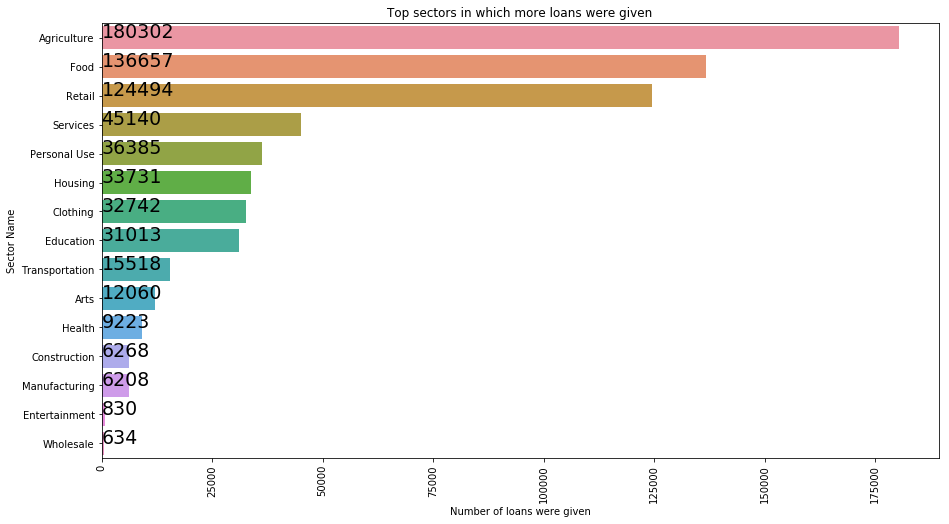

In [13]:
plt.figure(figsize=(15,8))
sector_name = kiva_loans_data['sector'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xticks(rotation='vertical')
plt.xlabel('Number of loans were given')
plt.ylabel('Sector Name')
plt.title("Top sectors in which more loans were given")
plt.show()

农业，食品，零售。。。这些都是生活啊

还款的情况

Text(0.5,1,'Types of repayment intervals with their count')

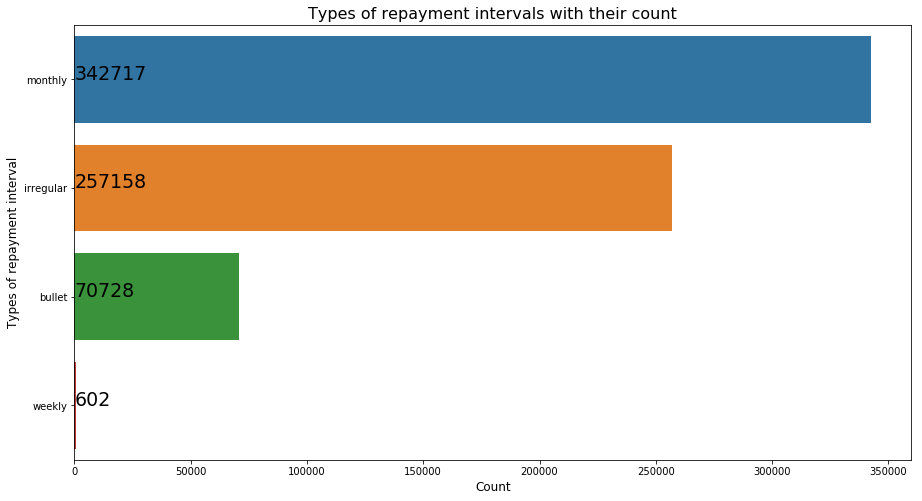

In [16]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['repayment_interval'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Types of repayment interval', fontsize=12)
plt.title("Types of repayment intervals with their count", fontsize=16)

哪些国家有需求

Text(0.5,1,'Most frequent countries for kiva loan')

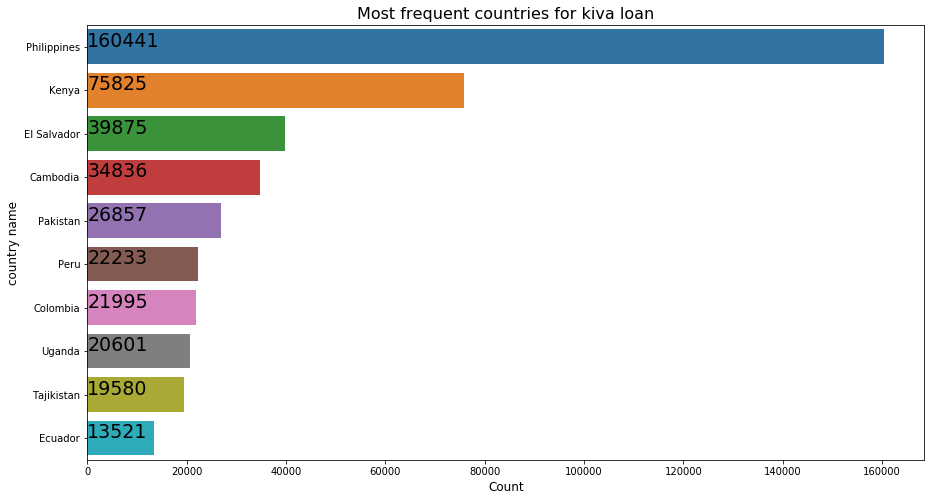

In [17]:
# Plot the most frequent countries
plt.figure(figsize=(15,8))
count = kiva_loans_data['country'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('country name', fontsize=12)
plt.title("Most frequent countries for kiva loan", fontsize=16)

菲律宾，肯尼亚。。。这些国家还是比较落后的

贷款的多少

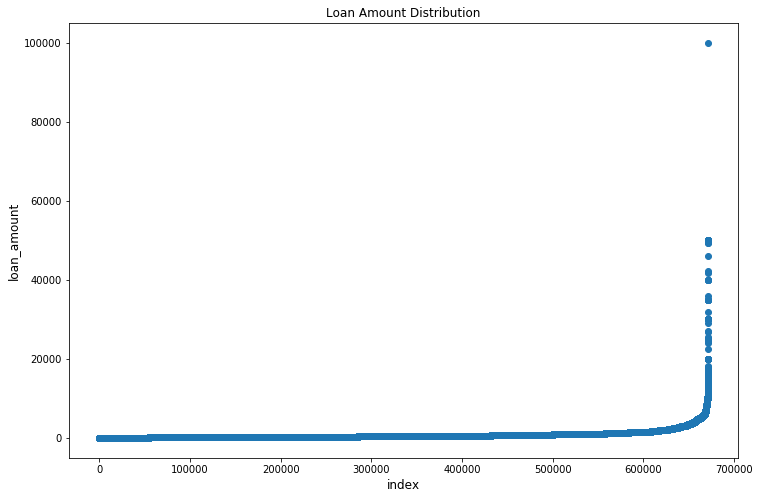

In [18]:
plt.figure(figsize = (12, 8))
plt.scatter(range(kiva_loans_data.shape[0]), np.sort(kiva_loans_data.funded_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

各个地区的需求情况

Text(0.5,1,'Distribution of world regions')

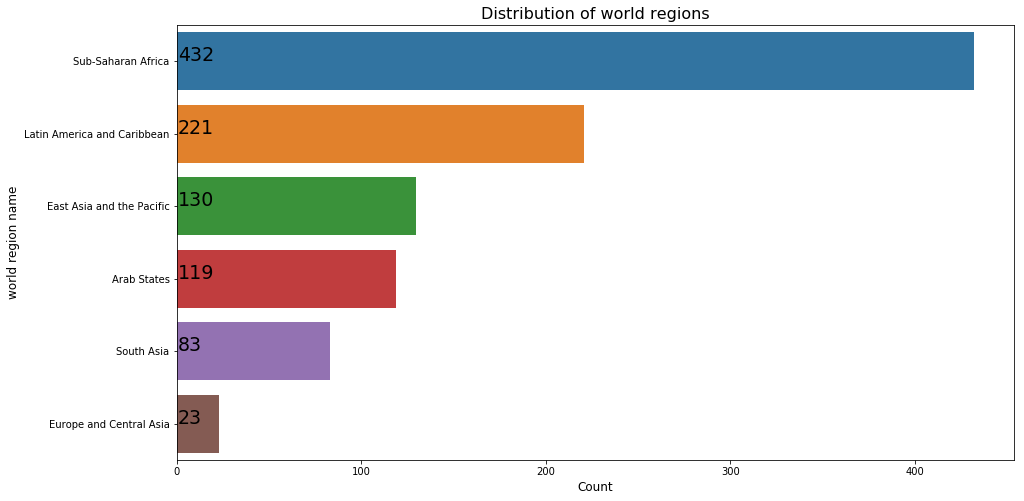

In [19]:
# Distribution of world regions
plt.figure(figsize=(15,8))
count = kiva_mpi_locations_data['world_region'].value_counts()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('world region name', fontsize=12)
plt.title("Distribution of world regions", fontsize=16)

撒哈拉以南非洲地区需求比较大，欧洲和中亚地区基本没什么需求

贷款人的数量分布

Number of lenders contributing to loan :  503
8     34204
7     32497
9     32476
1     31995
5     30439
6     29407
10    28171
11    25897
12    25291
4     24616
Name: lender_count, dtype: int64


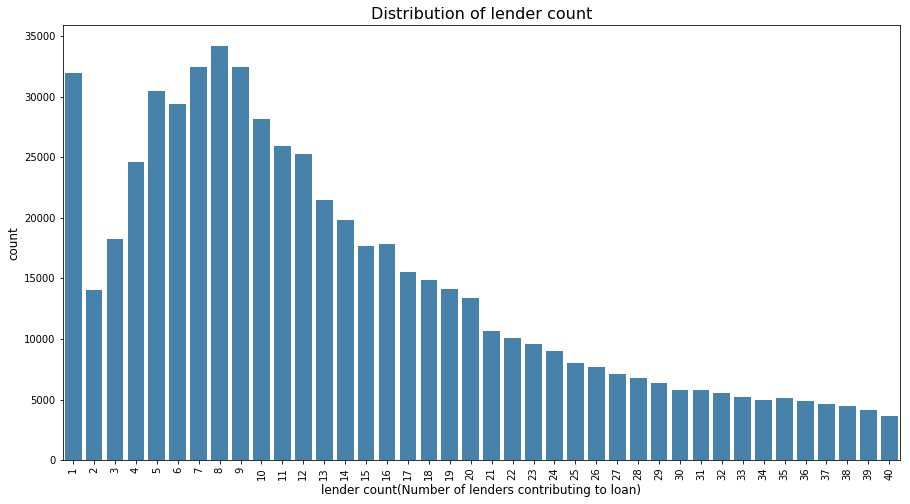

In [20]:
#Distribution of lender count(Number of lenders contributing to loan)
print("Number of lenders contributing to loan : ", len(kiva_loans_data["lender_count"].unique()))
print(kiva_loans_data["lender_count"].value_counts().head(10))
lender = kiva_loans_data['lender_count'].value_counts().head(40)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('lender count(Number of lenders contributing to loan)', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of lender count", fontsize=16)
plt.show()

贷款的明细目的

Text(0.5,1,'Top Loan Activity type')

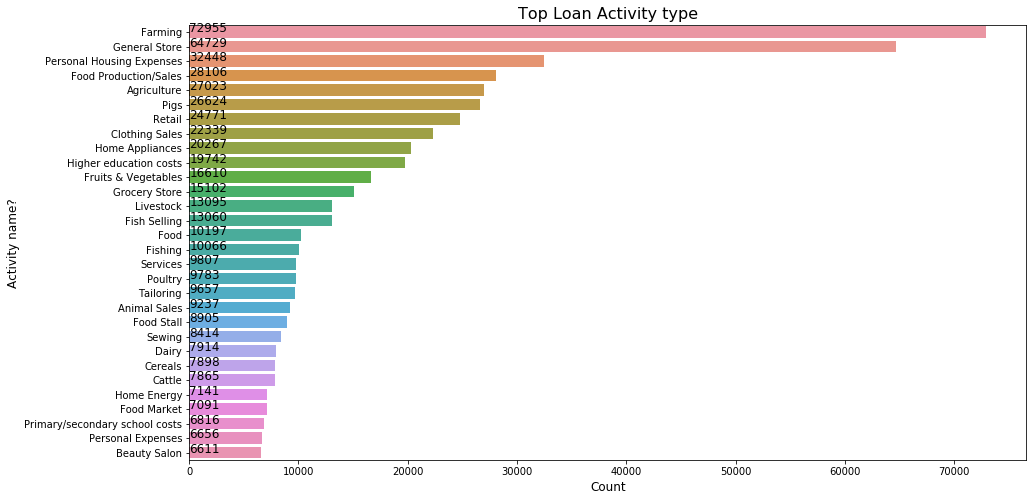

In [21]:
#Distribution of Loan Activity type

plt.figure(figsize=(15,8))
count = kiva_loans_data['activity'].value_counts().head(30)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Activity name?', fontsize=12)
plt.title("Top Loan Activity type", fontsize=16)

一般的商店和农业贷款比较多

多久能还钱呢？

Number of months over which loan was scheduled to be paid back :  148
14.0    166750
8.0     143042
11.0     40694
7.0      32847
13.0     30501
20.0     28483
6.0      26039
12.0     25700
15.0     25255
26.0     23431
Name: term_in_months, dtype: int64


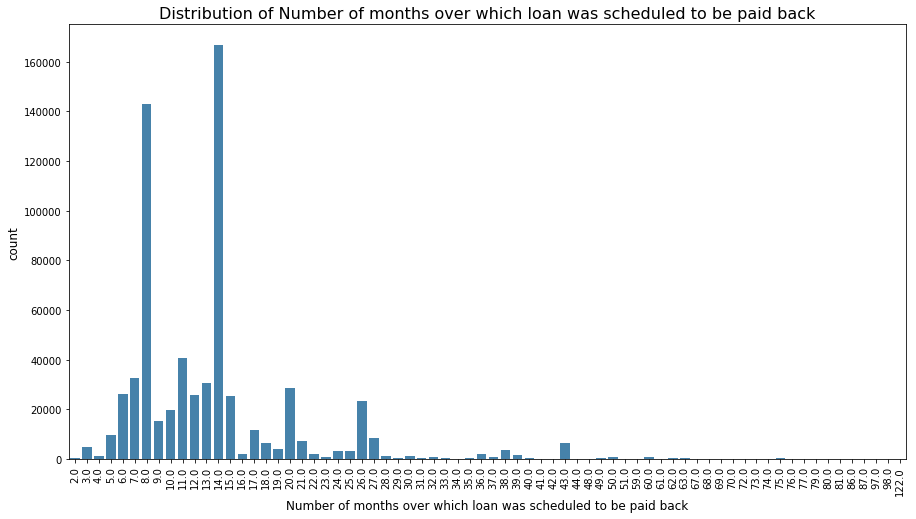

In [22]:
#Distribution of Number of months over which loan was scheduled to be paid back
print("Number of months over which loan was scheduled to be paid back : ", len(kiva_loans_data["term_in_months"].unique()))
print(kiva_loans_data["term_in_months"].value_counts().head(10))
lender = kiva_loans_data['term_in_months'].value_counts().head(70)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Number of months over which loan was scheduled to be paid back', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of Number of months over which loan was scheduled to be paid back", fontsize=16)
plt.show()

8个月，14个月还款的比较多。

squarify绘图

Text(0.5,1,'Distribution of sectors')

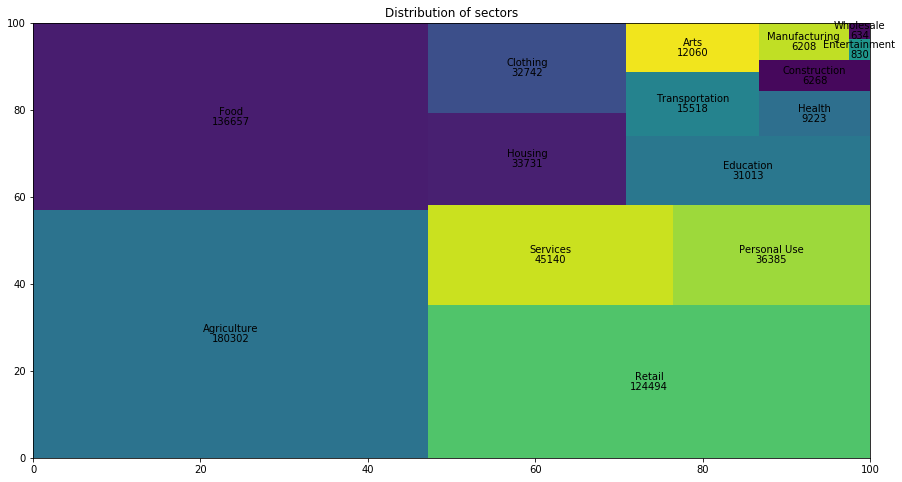

In [23]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['sector'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of sectors')

明细的

Text(0.5,1,'Distribution of Activities')

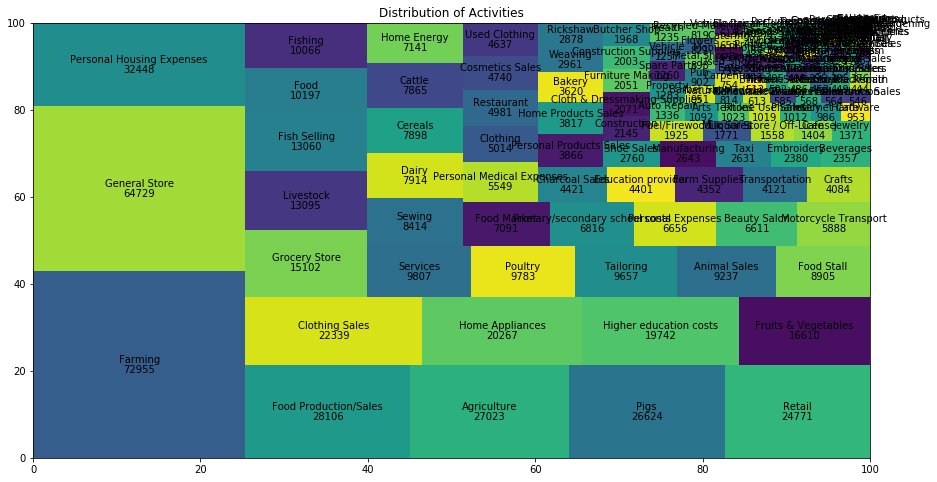

In [24]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['activity'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Activities')

拿钱都干啥去了？

Text(0.5,1,'Most popular uses of loans')

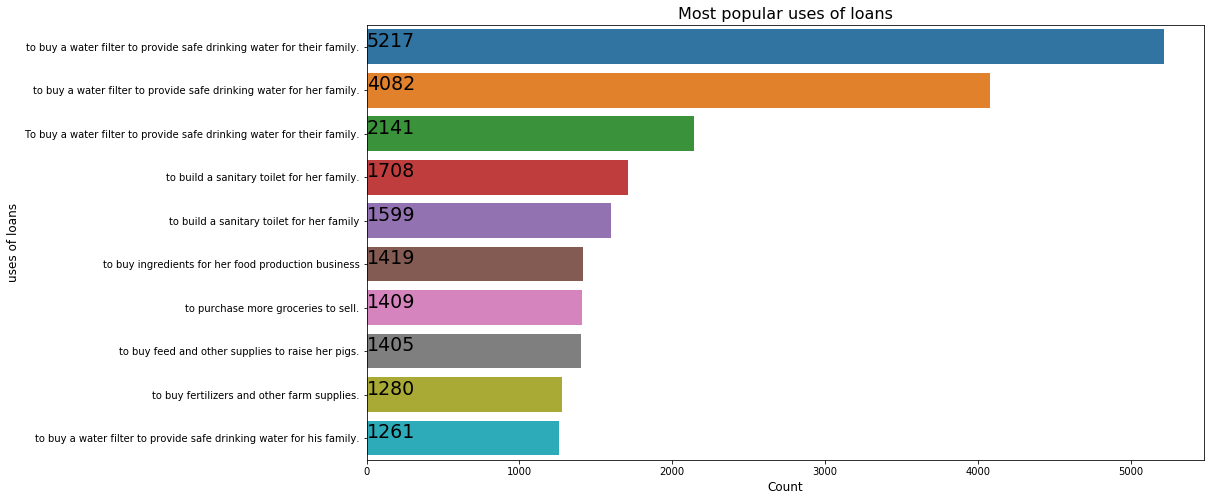

In [25]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['use'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('uses of loans', fontsize=12)
plt.title("Most popular uses of loans", fontsize=16)

性别比例

In [26]:
gender_list = []
for gender in kiva_loans_data["borrower_genders"].values:
    if str(gender) != "nan":
        gender_list.extend( [lst.strip() for lst in gender.split(",")] )
temp_data = pd.Series(gender_list).value_counts()

labels = (np.array(temp_data.index))
sizes = (np.array((temp_data / temp_data.sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Borrower Gender')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

竟然是女性比较多。。。。

平均的额度

  sex_borrowers  funded_amount
0          male     864.169009
1        female     761.531200


Text(0,0.5,'Average funded Amount(US)')

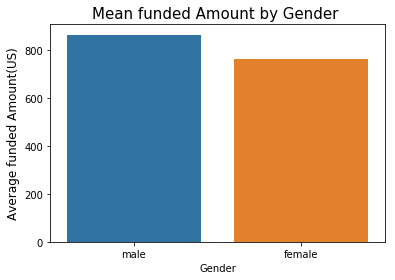

In [27]:
kiva_loans_data.borrower_genders = kiva_loans_data.borrower_genders.astype(str)
gender_data = pd.DataFrame(kiva_loans_data.borrower_genders.str.split(',').tolist())
kiva_loans_data['sex_borrowers'] = gender_data[0]
kiva_loans_data.loc[kiva_loans_data.sex_borrowers == 'nan', 'sex_borrowers'] = np.nan
sex_mean = pd.DataFrame(kiva_loans_data.groupby(['sex_borrowers'])['funded_amount'].mean().sort_values(ascending=False)).reset_index()
print(sex_mean)
g1 = sns.barplot(x='sex_borrowers', y='funded_amount', data=sex_mean)
g1.set_title("Mean funded Amount by Gender ", fontsize=15)
g1.set_xlabel("Gender")
g1.set_ylabel("Average funded Amount(US)", fontsize=12)

不同性别的还款方式比例

Genders count with repayment interval monthly
 female    244088
male       96083
Name: sex_borrowers, dtype: int64
Genders count with repayment interval weekly
 female    571
male       31
Name: sex_borrowers, dtype: int64
Genders count with repayment interval bullet
 male      35580
female    34058
Name: sex_borrowers, dtype: int64
Genders count with repayment interval irregular
 female    234926
male       21647
Name: sex_borrowers, dtype: int64


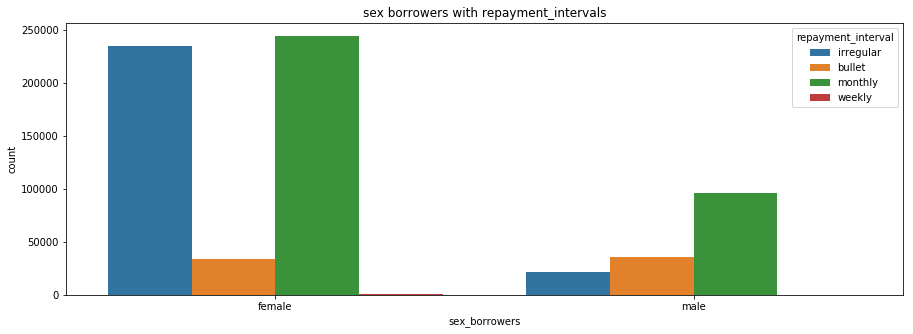

In [28]:
f, ax = plt.subplots(figsize=(15, 5))
print("Genders count with repayment interval monthly\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'monthly'].value_counts())
print("Genders count with repayment interval weekly\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'weekly'].value_counts())
print("Genders count with repayment interval bullet\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'bullet'].value_counts())
print("Genders count with repayment interval irregular\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'irregular'].value_counts())

sns.countplot(x="sex_borrowers", hue='repayment_interval', data=kiva_loans_data).set_title('sex borrowers with repayment_intervals');

不同国家的贷款情况

In [29]:
countries_funded_amount = kiva_loans_data.groupby('country').mean()['funded_amount'].sort_values(ascending = False)
print("Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)\n",countries_funded_amount.head(10))

Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)
 country
Cote D'Ivoire         50000.000000
Mauritania            15000.000000
Bhutan                 7812.500000
Chile                  7625.000000
Afghanistan            7000.000000
Congo                  6142.578125
Puerto Rico            4409.191176
Dominican Republic     4200.604839
Namibia                4046.875000
United States          3800.843591
Name: funded_amount, dtype: float64


In [30]:
data = [dict(
        type='choropleth',
        locations= countries_funded_amount.index,
        locationmode='country names',
        z=countries_funded_amount.values,
        text=countries_funded_amount.index,
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Top Countries with funded_amount(Mean value)'),
)]
layout = dict(title = 'Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

各行平均贷款情况

Text(0.5,1,'Popular loan sector in terms of loan amount')

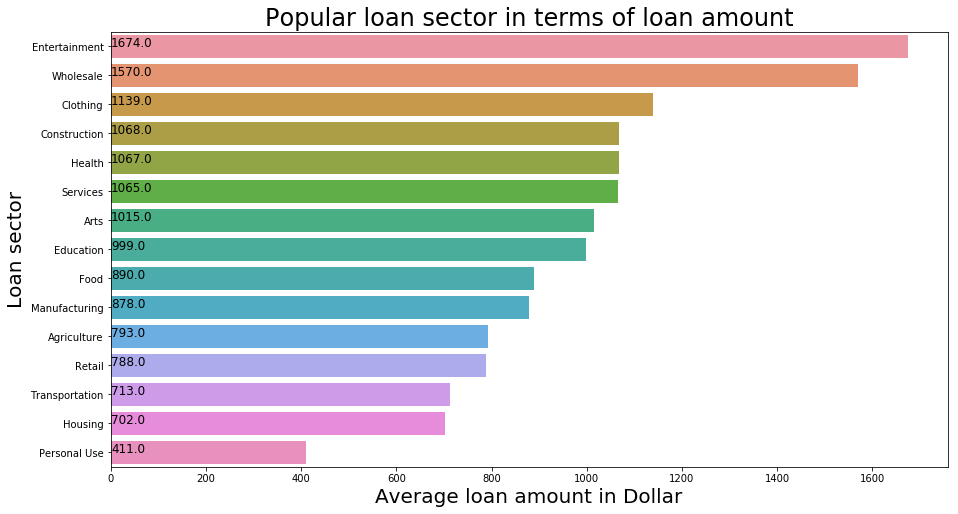

In [31]:
plt.figure(figsize=(15,8))
count = round(kiva_loans_data.groupby(['sector'])['loan_amount'].mean().sort_values(ascending=False))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan sector in terms of loan amount', fontsize=24)

哪些国家在数据集中比较抢眼呢

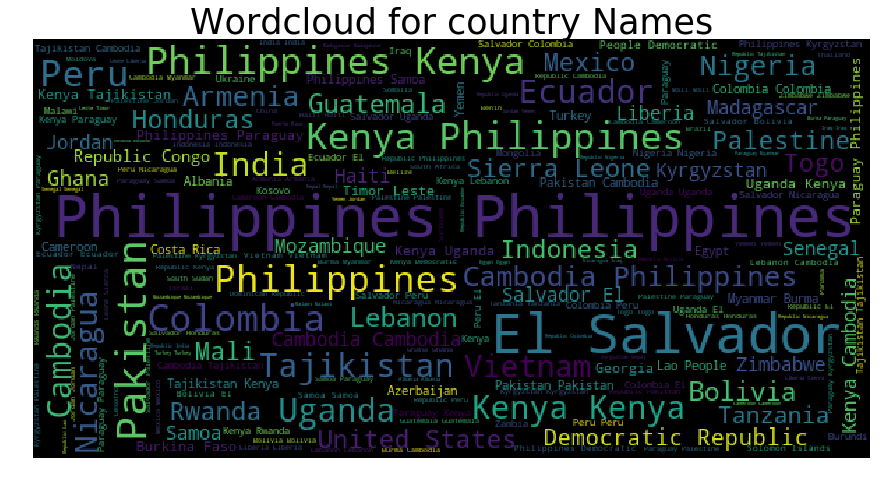

In [32]:
from wordcloud import WordCloud

names = kiva_loans_data["country"][~pd.isnull(kiva_loans_data["country"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for country Names", fontsize=35)
plt.axis("off")
plt.show() 

还款方式随时间的变动

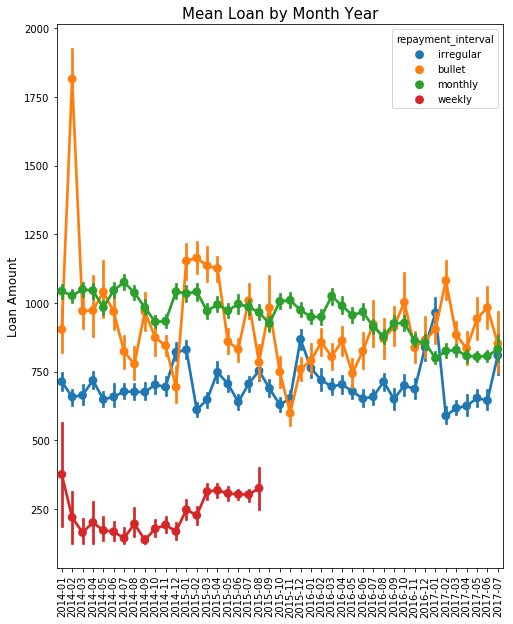

In [33]:
kiva_loans_data['date'] = pd.to_datetime(kiva_loans_data['date'])
kiva_loans_data['date_month_year'] = kiva_loans_data['date'].dt.to_period("M")
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='date_month_year', y='loan_amount', 
                   data=kiva_loans_data, hue='repayment_interval')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Mean Loan by Month Year", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Loan Amount", fontsize=12)
plt.show()

一次性偿还的方式比较多还是

不同国家贷款情况随时间的变化

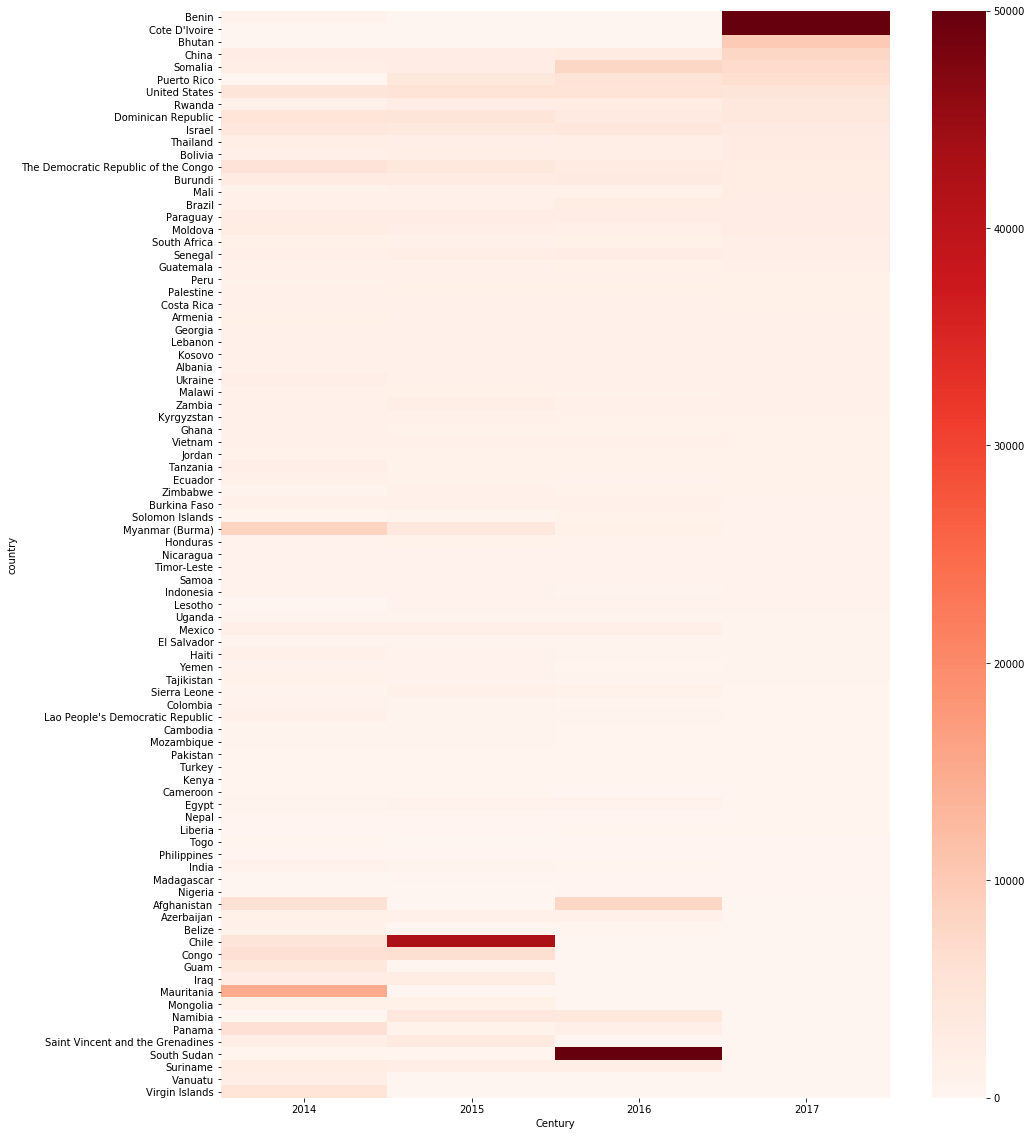

In [34]:
kiva_loans_data['Century'] = kiva_loans_data.date.dt.year
loan = kiva_loans_data.groupby(['country', 'Century'])['loan_amount'].mean().unstack()
loan = loan.sort_values([2017], ascending=False)
f, ax = plt.subplots(figsize=(15, 20)) 
loan = loan.fillna(0)
temp = sns.heatmap(loan, cmap='Reds')
plt.show()

不同种类的还款方式对比

In [35]:
sector_repayment = ['sector', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(kiva_loans_data[sector_repayment[0]], kiva_loans_data[sector_repayment[1]]).style.background_gradient(cmap = cm)

repayment_interval,bullet,irregular,monthly,weekly
sector,,,,
Agriculture,43963,47524,88776,39
Arts,1475,4636,5934,15
Clothing,1048,13559,17997,138
Construction,294,1549,4414,11
Education,2437,4351,24225,0
Entertainment,155,226,449,0
Food,4607,75914,56039,97
Health,138,1659,7413,13
Housing,880,8451,24400,0


不同国家的呢

In [36]:
sector_repayment = ['country', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(kiva_loans_data[sector_repayment[0]], kiva_loans_data[sector_repayment[1]]).style.background_gradient(cmap = cm)

repayment_interval,bullet,irregular,monthly,weekly
country,,,,
Afghanistan,2,0,0,0
Albania,23,26,1885,0
Armenia,43,170,8418,0
Azerbaijan,0,12,1933,0
Belize,0,0,125,0
Benin,1,40,456,0
Bhutan,0,2,0,0
Bolivia,39,1231,7536,0
Brazil,14,181,89,0


时间序列相关

loan amount和funded amount的趋势

In [37]:
kiva_loans_data.posted_time = pd.to_datetime(kiva_loans_data['posted_time'])
kiva_loans_data.disbursed_time = pd.to_datetime(kiva_loans_data['disbursed_time'])
kiva_loans_data.funded_time = pd.to_datetime(kiva_loans_data['funded_time'])

In [41]:
kiva_loans_data['loan_amount'].head()

posted_time
2014-01-01 06:12:39    300.0
2014-01-01 06:51:08    575.0
2014-01-01 09:58:07    150.0
2014-01-01 08:03:11    200.0
2014-01-01 11:53:19    400.0
Name: loan_amount, dtype: float64

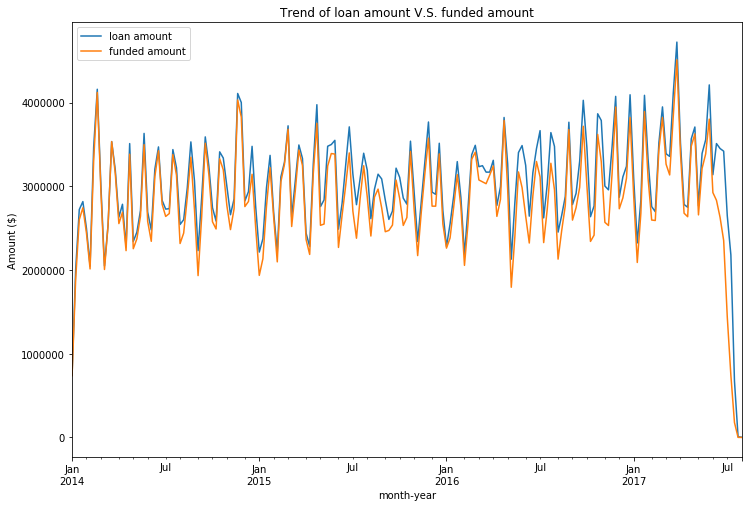

In [39]:
kiva_loans_data.index = pd.to_datetime(kiva_loans_data['posted_time'])
plt.figure(figsize = (12, 8))
ax = kiva_loans_data['loan_amount'].resample('w').sum().plot()
ax = kiva_loans_data['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(kiva_loans_data['posted_time'].min()), 
             pd.to_datetime(kiva_loans_data['posted_time'].max())))
ax.legend(["loan amount", "funded amount"])
plt.title('Trend of loan amount V.S. funded amount')

plt.show()

unfunded amount 和 funded amount

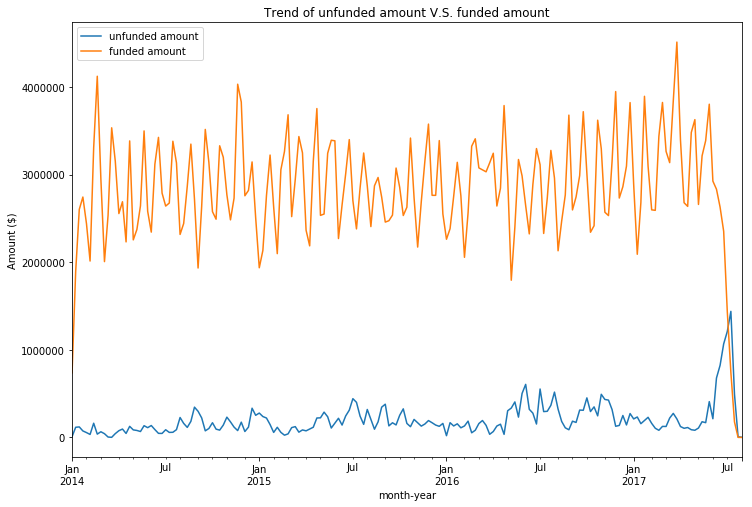

In [42]:
kiva_loans_data.index = pd.to_datetime(kiva_loans_data['posted_time'])

kiva_loans_data['unfunded_amount'] = kiva_loans_data['loan_amount'] - kiva_loans_data['funded_amount']
plt.figure(figsize = (12, 8))
ax = kiva_loans_data['unfunded_amount'].resample('w').sum().plot()
ax = kiva_loans_data['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(kiva_loans_data['posted_time'].min()), 
             pd.to_datetime(kiva_loans_data['posted_time'].max())))
ax.legend(["unfunded amount", "funded amount"])
plt.title('Trend of unfunded amount V.S. funded amount')

plt.show()

针对个别地区

In [43]:
loan_use_in_india = kiva_loans_data['use'][kiva_loans_data['country'] == 'India']
percentages = round(loan_use_in_india.value_counts() / len(loan_use_in_india) * 100, 2)[:13]
trace = go.Pie(labels=percentages.keys(), values=percentages.values, hoverinfo='label+percent', 
                textfont=dict(size=18, color='#000000'))
data = [trace]
layout = go.Layout(width=800, height=800, title='Top 13 loan uses in India',titlefont= dict(size=20), 
                   legend=dict(x=0.1,y=-5))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, show_link=False)

In [ ]:
#无烟炉
#裁缝
#奶牛

在印度最大的贷款用途是购买无烟炉，然后通过购买布料和缝纫机来扩大她的剪裁业务。

In [44]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='India'])
temp.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
11972,225,Novica,Artisan,a1050000000T14Q,Artisan,India,No,Agra,NaN,IND,1,2100,"Agra, India","[(27.1766701, 78.00807449999999)]",Agra; Agra; Uttar Pradesh; India,"(27.1766701, 78.00807449999999)",27.176670,78.008075,IND,NaN,0.0
11986,225,Novica,Artisan,a1050000000T14Q,Artisan,India,No,Haryana,NaN,IND,1,1200,"Haryana, India","[(29.0587757, 76.085601)]",Haryana; India,"(29.0587757, 76.085601)",29.058776,76.085601,IND,NaN,0.0
11987,225,Novica,Artisan,a1050000000T14Q,Artisan,India,No,Jaipur,NaN,IND,2,4000,"Jaipur, India","[(26.9124336, 75.7872709)]",Jaipur; Jaipur; Rajasthan; India,"(26.9124336, 75.7872709)",26.912434,75.787271,IND,NaN,0.0
11994,225,Novica,Artisan,a1050000000T14Q,Artisan,India,No,New Delhi,NaN,IND,4,6050,"New Delhi, India","[(28.6139391, 77.2090212)]",New Delhi; Delhi; India,"(28.6139391, 77.2090212)",28.613939,77.209021,IND,NaN,0.0
12085,238,WSDS-Initiate,General Financial Inclusion,a1050000000sjE7,Underserved,India,No,Bishnupur,NaN,IND,12,2675,"Bishnupur, India","[(23.0678795, 87.3165222)]",Bishnupur; Bankura; West Bengal; India; 722122,"(23.0678795, 87.3165222)",23.067880,87.316522,IND,NaN,0.0


In [45]:
# A table to show top 7 regions in India with higher funded amount
print("The top 7 regions in India with higher funded amount(Descending Order)")
top_cities = temp.sort_values(by='amount',ascending=False)
top7_cities=top_cities.head(7)
top7_cities

The top 7 regions in India with higher funded amount(Descending Order)


,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
14366,428,Milaap,General Financial Inclusion,a1050000006Bkn5,Prayas: General,India,No,Surendranagar,NaN,IND,401,153575,"Surendranagar, India","[(22.7738938, 71.6673352)]",Surendranagar; Gujarat; India,"(22.7738938, 71.6673352)",22.773894,71.667335,IND,NaN,40.0
14335,428,Milaap,General Financial Inclusion,a1050000005zJrh,SMGBK: General,India,No,Nadia,NaN,IND,386,121200,"Nadia, India","[(23.4709656, 88.55653099999999)]",Nadia; West Bengal; India,"(23.4709656, 88.55653099999999)",23.470966,88.556531,IND,NaN,40.0
14279,428,Milaap,General Financial Inclusion,a1050000006Bkn5,Prayas: General,India,No,Dahod,NaN,IND,419,112025,"Dahod, India","[(22.8379314, 74.2531465)]",Dahod; Dahod; Gujarat; India,"(22.8379314, 74.2531465)",22.837931,74.253146,IND,NaN,40.0
13355,334,Belghoria Janakalyan Samity,General Financial Inclusion,a1050000002VkWz,Underserved,India,Yes,Falakata,NaN,IND,382,109475,"Falakata, India","[(26.517486, 89.2039195)]",Falakata; Alipurduar; West Bengal; India; 735211,"(26.517486, 89.2039195)",26.517486,89.203919,IND,NaN,82.0
14314,428,Milaap,General Financial Inclusion,a1050000006TqMf,Mahashakti: Underserved,India,No,Khurda,NaN,IND,321,106975,"Khurda, India","[(20.1934552, 85.63320929999999)]",Khurdha; Khordha; Odisha; India,"(20.1934552, 85.63320929999999)",20.193455,85.633209,IND,NaN,40.0
14300,428,Milaap,General Financial Inclusion,a1050000007Qn1B,Apani: General,India,No,Jaipur,NaN,IND,312,105825,"Jaipur, India","[(26.9124336, 75.7872709)]",Jaipur; Jaipur; Rajasthan; India,"(26.9124336, 75.7872709)",26.912434,75.787271,IND,NaN,40.0
14354,428,Milaap,General Financial Inclusion,a1050000006TqMf,Mahashakti: Underserved,India,No,Rayagada,NaN,IND,248,95500,"Rayagada, India","[(19.171209, 83.4163226)]",Rayagada; Rayagada; Odisha; India,"(19.171209, 83.4163226)",19.171209,83.416323,IND,NaN,40.0


Text(0.5,1,'Top 7 funded regions in India')

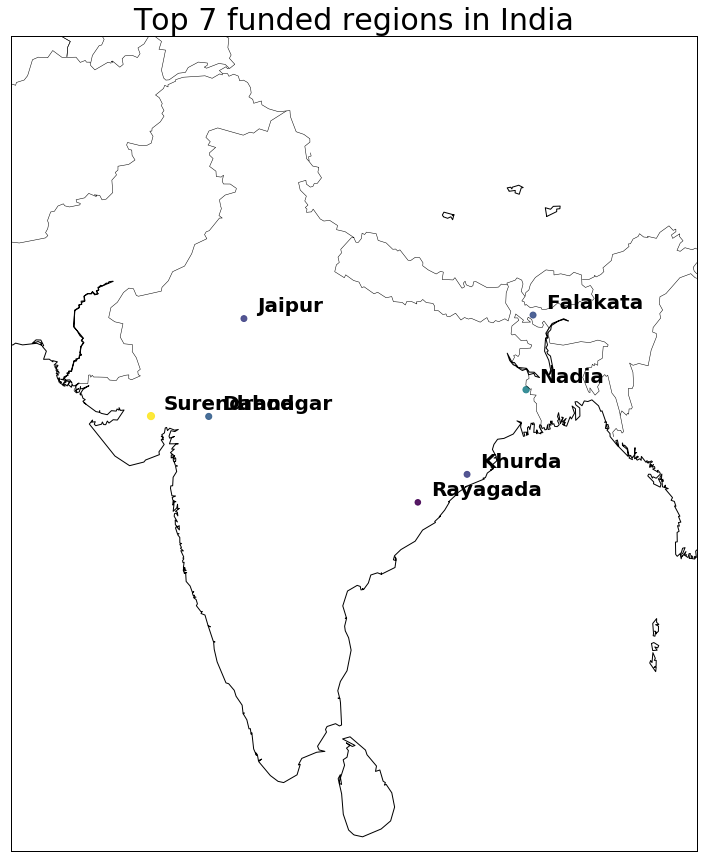

In [46]:
# Plotting these Top 7 funded regions on India map. Circles are sized according to the 
# regions of the india

plt.subplots(figsize=(20, 15))
map = Basemap(width=4500000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

lg=array(top7_cities['lon'])
lt=array(top7_cities['lat'])
pt=array(top7_cities['amount'])
nc=array(top7_cities['region'])

x, y = map(lg, lt)
population_sizes = top7_cities["amount"].apply(lambda x: int(x / 3000))
plt.scatter(x, y, s=population_sizes, marker="o", c=population_sizes, alpha=0.9)


for ncs, xpt, ypt in zip(nc, x, y):
    plt.text(xpt+60000, ypt+30000, ncs, fontsize=20, fontweight='bold')

plt.title('Top 7 funded regions in India',fontsize=30)

趋势

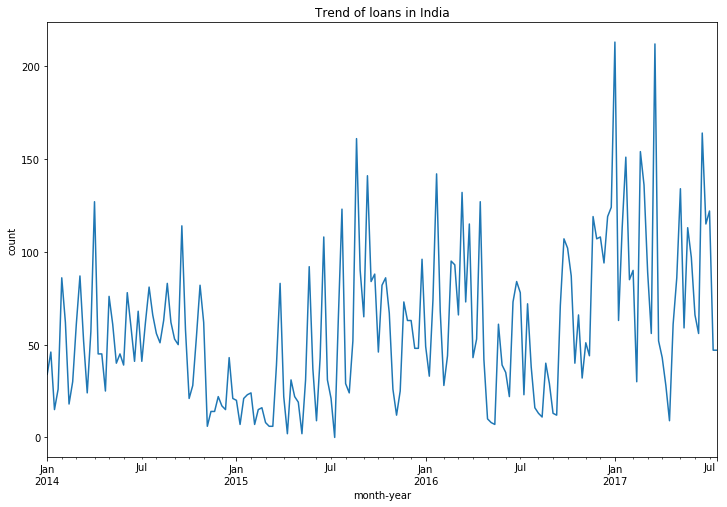

In [47]:
kiva_loans_data.index = pd.to_datetime(kiva_loans_data['funded_time'])
plt.figure(figsize = (12, 8))
ax = kiva_loans_data[kiva_loans_data["country"]=='India']['funded_time'].resample('w').count().plot()
ax.set_ylabel('count')
ax.set_xlabel('month-year')
plt.title('Trend of loans in India')

plt.show()

贫苦指数

In [48]:
data = [ dict(
        type = 'scattergeo',
        lat = kiva_mpi_locations_data['lat'],
        lon = kiva_mpi_locations_data['lon'],
        text = kiva_mpi_locations_data['LocationName'],
        marker = dict(
             size = 10,
             line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = kiva_mpi_locations_data['MPI'],
            cmax = kiva_mpi_locations_data['MPI'].max(),
            colorbar=dict(
                title="Multi-dimenstional Poverty Index"
            )
        ))]
layout = dict(title = 'Multi-dimensional Poverty Index for different regions')
fig = dict( data=data, layout=layout )
py.iplot(fig)

人类发展指数

In [49]:
print("Top 10 countries with higher Human Development Index(HDI) \n")
temp = country_stats_data.sort_values(by =['hdi'], ascending = False)
temp[['country_name','hdi']].head(10)

Top 10 countries with higher Human Development Index(HDI) 



,country_name,hdi
162,Norway,0.949423
122,Switzerland,0.939131
151,Australia,0.938680
23,Germany,0.925669
167,Singapore,0.924866
114,Denmark,0.924649
95,Netherlands,0.924312
133,Ireland,0.922746
157,Iceland,0.921110
72,Canada,0.920284


In [51]:
data = [dict(
        type='choropleth',
        locations= country_stats_data['country_name'],
        locationmode='country names',
        z=country_stats_data['hdi'],
        text=country_stats_data['country_name'],
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Human Development Index(HDI)'),
)]
layout = dict(title = 'Human Development Index(HDI) for different countries',)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)


不同国家贫穷对比

Text(0.5,1,'population below poverty line for different countries in % ')

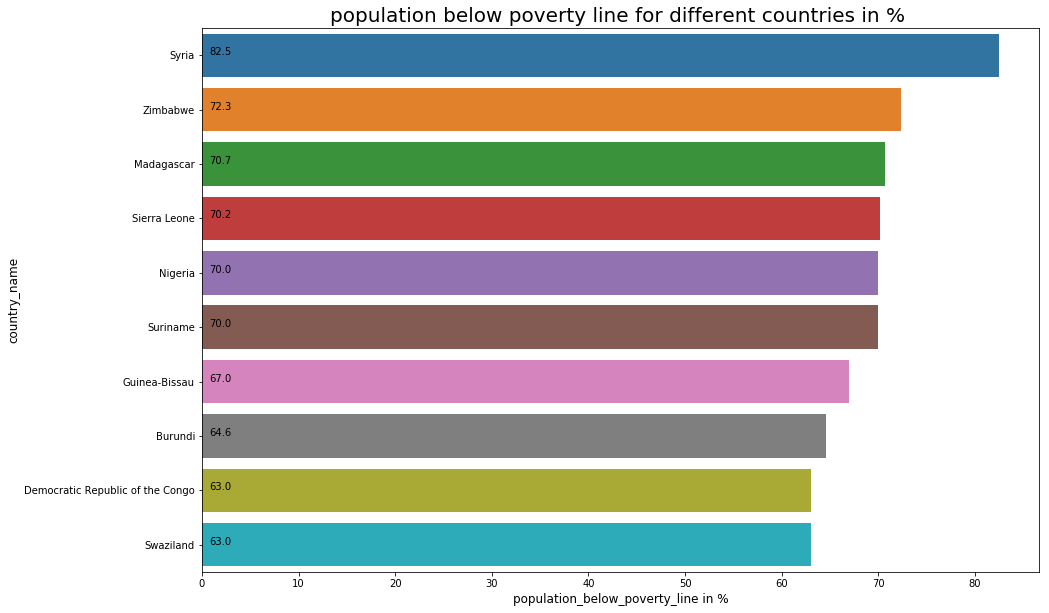

In [52]:
temp = country_stats_data.sort_values(by =['population_below_poverty_line'], ascending = False)
temp2 = temp[['country_name','population_below_poverty_line']]
temp1 = temp2.head(10)
plt.figure(figsize = (15, 10))
sns.barplot(temp1['population_below_poverty_line'], temp1['country_name'])
for i, v in enumerate(temp1['population_below_poverty_line']):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xlabel('population_below_poverty_line in %', fontsize=12)
plt.ylabel('country_name', fontsize=12)
plt.title("population below poverty line for different countries in % ", fontsize=20)

In [53]:
data = [dict(
        type='choropleth',
        locations= country_stats_data['country_name'],
        locationmode='country names',
        z=country_stats_data['population_below_poverty_line'],
        text=country_stats_data['country_name'],
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='population_below_poverty_line in %'),
)]
layout = dict(title = 'Population below poverty line for different countries in % ',)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)